In [1]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
toloka_data = data.TolokaDataProvider()

Iter 00, logit: -7.475205
Iter 40, logit: -6.368210
[0.14769311 0.10560202 0.41222155 0.06779544 0.26668787]
Label accuracy is 0.7655172413793103
--------------------------------------------------
Data has 53 features
1.0
Iter 00, logit: -7.510731
Iter 40, logit: -6.051414
Iter 80, logit: -5.971976
Iter 120, logit: -5.931868
Iter 160, logit: -5.906147
(870, 53)
Classifier train accuracy is 0.7091954022988506
(121, 53)
Classifier test accuracy is 0.6942148760330579
Label accuracy is 0.7609195402298851
--------------------------------------------------
Data has 53 features
1.0
True labels distribution [0.05862069 0.04022989 0.55862069 0.05172414 0.2908046 ]
Iter 00, logit: -7.509311
Average Raykar weight is 0.7440606479718583
Iter 40, logit: -6.060459
Average Raykar weight is 0.9314725080725922
Iter 80, logit: -5.981608
Average Raykar weight is 0.9363006780335991
Iter 120, logit: -5.952674
Average Raykar weight is 0.8649350541773243
Iter 160, logit: -5.933122
Average Raykar weight is 0.8

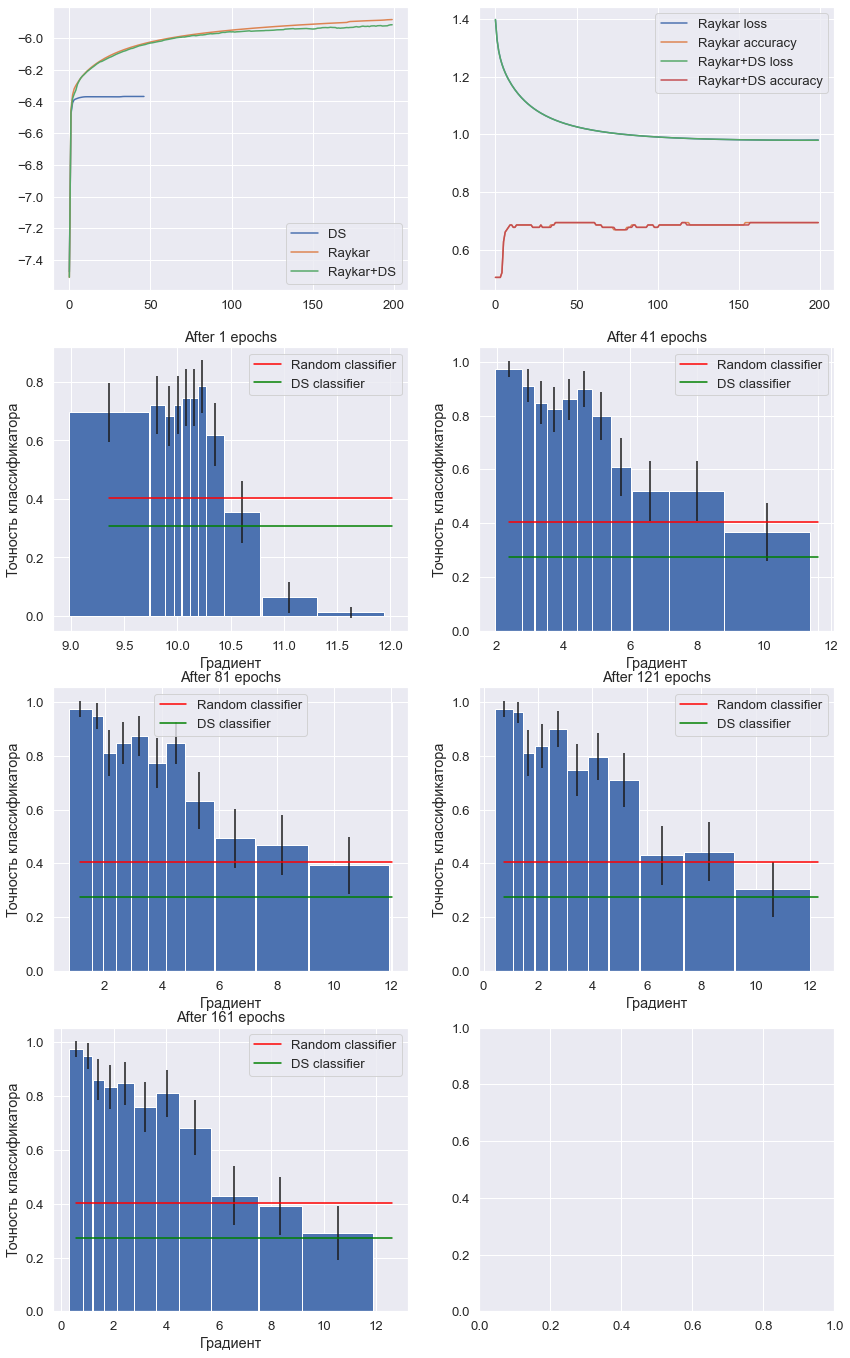

In [3]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=200, lr=0.0001)

Number of data points: 870
[0.05862069 0.04022989 0.55862069 0.05172414 0.2908046 ]
0.4043546043070419
[0.98       0.93       0.83       0.82       0.76       0.78
 0.47       0.41       0.27142857]
[0.54415 0.44737 0.61051 0.80686 1.16603 1.28455 2.04204 2.35377 3.28012]
[0.24159 0.24484 0.25457 0.25871 0.27264]


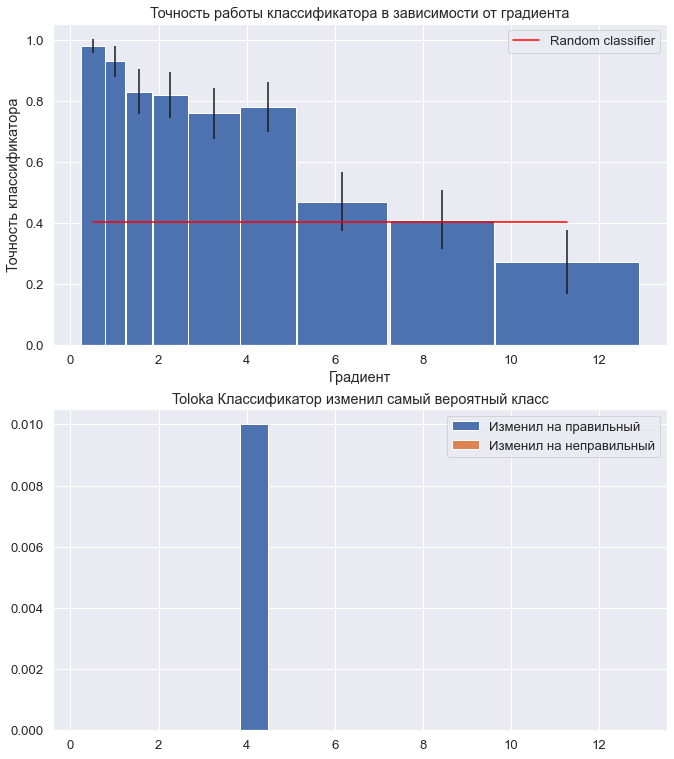

In [15]:
reload_all()
n = 100
buckets, confidences, max_grad, rnd_accuracy = bm.build_grad_hist(toloka_data, toloka_methods, toloka_points, 'Toloka', n)
confidence_toloka = bm.get_confidence(buckets, confidences, rnd_accuracy)

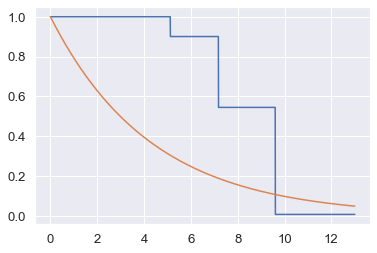

In [16]:
xs = np.linspace(0, 13, 1500)
ys = list(map(lambda x: confidence_toloka(x), xs))
plt.plot(xs, ys)
lambda2 = lambda x: np.exp(-x / max_grad * 3)
plt.plot(xs, list(map(lambda2, xs)))

Iter 00, logit: -7.475205
Iter 20, logit: -6.370250
Iter 40, logit: -6.368210
[0.14769311 0.10560202 0.41222155 0.06779544 0.26668787]
Label accuracy is 0.7655172413793103
--------------------------------------------------
Data has 53 features
1.0
Iter 00, logit: -7.510731
Iter 20, logit: -6.138211
Iter 40, logit: -6.051414
Iter 60, logit: -6.003354
Iter 80, logit: -5.971976
(870, 53)
Classifier train accuracy is 0.7264367816091954
(121, 53)
Classifier test accuracy is 0.6776859504132231
Label accuracy is 0.7609195402298851
--------------------------------------------------
Data has 53 features
1.0
Iter 00, logit: -7.473999
Average Raykar weight is 0.022127586206896522
Iter 20, logit: -6.164001
Average Raykar weight is 0.8547172413793104
Iter 40, logit: -6.074249
Average Raykar weight is 0.8807260919540231
Iter 60, logit: -6.029508
Average Raykar weight is 0.8795073563218392
Iter 80, logit: -6.002651
Average Raykar weight is 0.8698719540229886
Average Raykar weight is 0.867780574712643

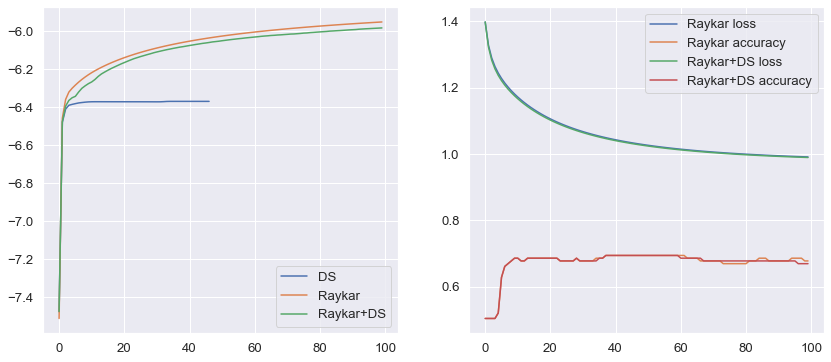

In [18]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=100, lr=0.0001, 
                                                                      confidence_estimator=confidence_toloka)

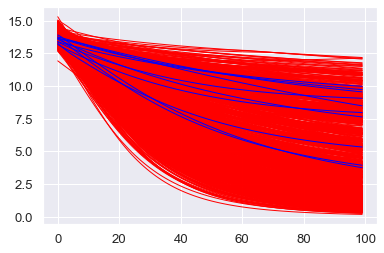

In [7]:
reload_all()
bm.plot_all_gradients(toloka_points,
                              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'Toloka') 

In [20]:
toloka_points[toloka_points.task.isin(advantages_matrix[0][1])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
53,t109,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -6.206, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -4.463, -254.899, -inf, -inf]","[0.152, 0.372, 0.23, 0.097, 0.149]","[13.63433, 13.57861, 13.53268, 13.49024, 13.45...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -6.215, -inf, -inf]","[0.154, 0.319, 0.271, 0.108, 0.147]",9.96913,"[0.0, 1.0]",53
159,t226,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -73.254, -9.259, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -8.102, -inf, -inf, -inf]","[0.228, 0.213, 0.345, 0.119, 0.096]","[13.38269, 13.26278, 13.15123, 13.04226, 12.93...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -140.029, -9.257, -inf, -inf]","[0.227, 0.172, 0.398, 0.109, 0.094]",7.68046,"[0.019, 0.981]",159
326,t405,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -16.522, -inf, -inf]","[1.0, 0.0, 0.0, 0.0, 0.0]","[-14.091, -inf, -inf, -inf, -inf]","[0.402, 0.079, 0.087, 0.079, 0.354]","[13.57739, 13.46542, 13.36371, 13.26446, 13.16...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -16.52, -inf, -inf]","[0.314, 0.071, 0.114, 0.064, 0.438]",6.75328,"[1.0, 0.0]",326
342,t423,"[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -8.228]","[0.0, 0.0, 0.0, 1.0, 0.0]","[-inf, -inf, -inf, -6.688, -inf]","[0.318, 0.243, 0.059, 0.153, 0.226]","[13.6589, 13.60906, 13.55906, 13.48799, 13.417...","[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -8.228]","[0.304, 0.231, 0.056, 0.109, 0.3]",10.37509,"[0.0, 1.0]",342
376,t462,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-521.513, -inf, -11.083, -inf, -inf]","[1.0, 0.0, 0.0, 0.0, 0.0]","[-10.62, -inf, -inf, -inf, -inf]","[0.586, 0.065, 0.184, 0.072, 0.094]","[13.91643, 13.78829, 13.6108, 13.43409, 13.257...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -11.081, -inf, -inf]","[0.556, 0.067, 0.212, 0.075, 0.09]",4.32263,"[0.994, 0.006]",376
379,t466,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -10.896, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -10.586, -inf, -inf, -inf]","[0.114, 0.162, 0.497, 0.151, 0.076]","[13.26697, 13.06162, 12.87193, 12.68875, 12.51...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -10.896, -inf, -inf]","[0.101, 0.096, 0.613, 0.116, 0.075]",3.15467,"[1.0, 0.0]",379
435,t527,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -15.55, -inf, -inf]","[0.0, 0.0, 0.0, 1.0, 0.0]","[-inf, -inf, -inf, -12.113, -inf]","[0.335, 0.082, 0.382, 0.118, 0.083]","[13.18078, 13.0431, 12.91889, 12.79724, 12.678...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -15.55, -inf, -inf]","[0.298, 0.072, 0.445, 0.094, 0.092]",6.43683,"[1.0, 0.0]",435
450,t542,"[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -12.736]","[1.0, 0.0, 0.0, 0.0, 0.0]","[-13.326, -inf, -inf, -inf, -inf]","[0.243, 0.115, 0.251, 0.071, 0.32]","[13.39513, 13.32254, 13.25512, 13.19115, 13.12...","[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -12.736]","[0.135, 0.123, 0.232, 0.064, 0.447]",6.44296,"[1.0, 0.0]",450
716,t835,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -9.451, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -6.651, -inf, -inf, -inf]","[0.076, 0.18, 0.576, 0.074, 0.094]","[13.76019, 13.55856, 13.37238, 13.18914, 13.00...","[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -9.42, -inf, -inf]","[0.064, 0.12, 0.671, 0.062, 0.083]",2.36887,"[1.0, 0.0]",716
744,t867,"[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -12.311]","[0.0, 0.0, 0.0, 1.0, 0.0]","[-inf, -inf, -inf, -8.943, -inf]","[0.334, 0.13, 0.14, 0.204, 0.191]","[13.74143, 13.7107, 13.64671, 13.58045, 13.514...","[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -12.311]","[0.297, 0.115, 0.176, 0.15, 0.262]",10.64819,"[0.0, 1.0]",744


Annotation(annotator='w730', task='t118', value='3')
Annotation(annotator='w680', task='t118', value='3')
Annotation(annotator='w365', task='t118', value='3')
Annotation(annotator='w200', task='t118', value='3')
Annotation(annotator='w450', task='t118', value='3')
Annotation(annotator='w765', task='t118', value='3')
Annotation(annotator='w70', task='t118', value='3')
Annotation(annotator='w485', task='t118', value='3')
Annotation(annotator='w35', task='t118', value='3')
Annotation(annotator='w45', task='t118', value='3')
Annotation(annotator='w235', task='t118', value='3')
Annotation(annotator='w370', task='t118', value='3')
Annotation(annotator='w695', task='t118', value='3')


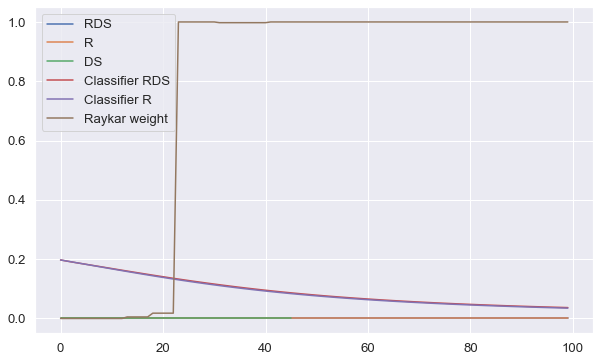

In [9]:
bm.plots_for_point(toloka_points, toloka_data, toloka_methods, 62)

0.9954022988505747
0.558


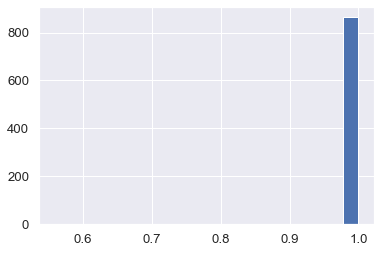

In [10]:
def build_conf_hist(points, name):
    max_confidence = np.array(list(map(lambda x: x.max(), points[name].values)))
    plt.hist(max_confidence, bins=20)
    print((max_confidence > 0.95).mean())
    print(max_confidence.min())
build_conf_hist(toloka_points, 'mu_ds')

[11.41229, 8.44327, 9.08712, 3.60123, 11.01813, 1.79975, 6.79889, 4.10308]
8 4


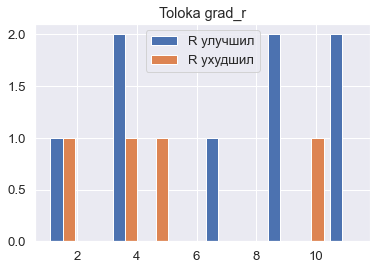

In [5]:
reload_all()
bm.plot_flips(toloka_points[toloka_points.task.isin(advantages_matrix[0][2])], 
              toloka_points[toloka_points.task.isin(advantages_matrix[2][0])], 'grad_r', 'Toloka', 'R улучшил', 'R ухудшил')

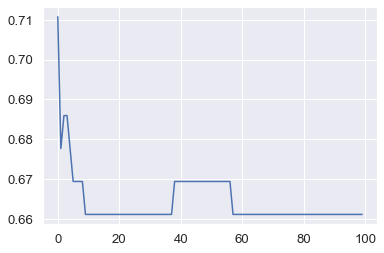

In [12]:
plt.plot(toloka_methods[1].accuracies)

(0.47107438016528924, 0.4793388429752066)

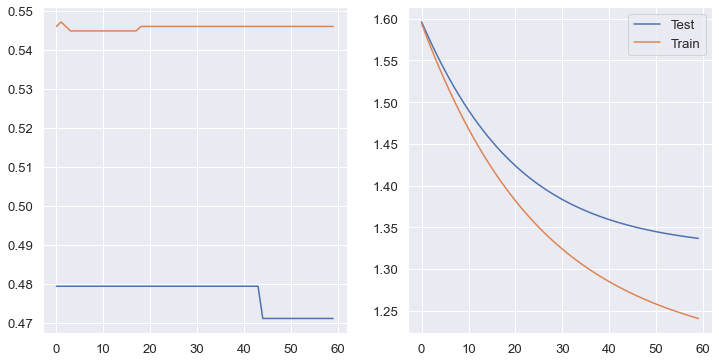

In [13]:
reload_all()
bm.run_mv_classifier(toloka_data, iters=60, n_classes=5, lr=300, hard=False)

1.0


(0.6942148760330579, 0.6942148760330579)

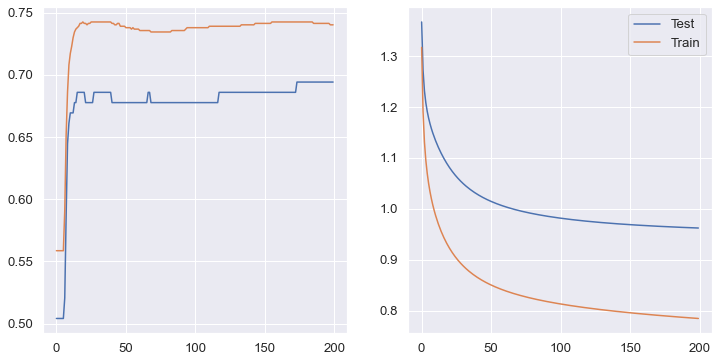

In [13]:
reload_all()
bm.run_mv_classifier(toloka_data, iters=200, n_classes=5, lr=0.0001, hard=True)

In [23]:
predictions = np.array([[0.1, 0.9], [0.5, 0.5], [0.2, 0.8]])
X = np.ones((3, 5))

np.linalg.norm((1 - predictions.max(axis=1))[:, None] * X, axis=1) ** 2

array([0.05, 1.25, 0.2 ])

In [24]:
(1 - predictions.max(axis=1))[:, None] * X

array([[0.1, 0.1, 0.1, 0.1, 0.1],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.2, 0.2, 0.2, 0.2, 0.2]])